In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
#1. Load the csv file and show top 5 records from it.
#The .csv file is stored in the same folder, thus this code extracts it to a dataframe 
csv_file = os.path.join("./","players_20.csv")
players_df = pd.read_csv(csv_file)
players_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
#2. How would you see each column's name?
print(players_df.columns)
#This code will print every individual column title (not in a list):
#for title in players_df.columns:
#    print(title)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


In [4]:
#3. Need to show number of rows and columns of this dataset.
#df.shape gives a touple of (rows, columns)
dimensions = players_df.shape
print(f"The data has {dimensions[0]} rows and {dimensions[1]} columns.")

The data has 18278 rows and 104 columns.


In [5]:
#4. Show number of players and their countries.
nations_df = players_df[['long_name','nationality']]
nations_df = nations_df.groupby(by='nationality').count().rename(columns={'long_name':'count'})
nations_df

,count
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


In [20]:
#5. If you find many records in point 4 then show only top 10 countries and their number of players.
nations_df.sort_values(by=['count'], ascending=False).head(10)

,count
nationality,
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
Brazil,824
Italy,732
Colombia,591
Japan,453


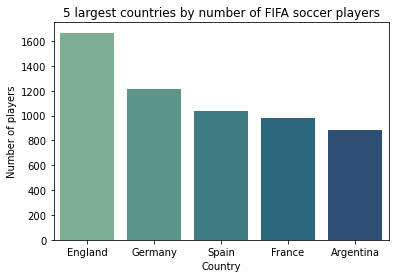

In [7]:
#6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.
#Extract the top 5 nations from the data and create lists with both the nation's name and the player count, separately.
top_five_nations = nations_df.sort_values(by='count', ascending = False).head(5)
countries = top_five_nations.index
player_count = top_five_nations['count']

#Construct the bar chart using seaborn
sns.barplot(x=countries, y=player_count, palette='crest')
plt.title('5 largest countries by number of FIFA soccer players')
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.show()

#I used the crest color palette because I thought it looked better than pure green (this my specific color palettes),
#     but "Greens_d" or "Greens_r" would have given a purely green bar chart

In [8]:
#7. Show top 5 players short name and wages.
#Unclear on what qualifies a player as "top 5". Will use the "overall" column.

#Players_df appears to be sorted by overall, but may as well be certain
overall_sorted_df = players_df.sort_values(by=['overall'], ascending=False).reset_index()

#Because the "overall" column is discrete, there is a likelihood that there will be a tie for 5th place. These two lines will
#    ensure that anyone tied for 5th is displayed. .head() can be used to display only 5 entries.
overall_limit = overall_sorted_df.overall[4]
five_plus_best = overall_sorted_df[overall_sorted_df.overall >= overall_limit]


five_plus_best[['short_name', 'wage_eur']]

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000
5,K. De Bruyne,370000


In [9]:
#8. Show top 5 players short name and wages that are getting highest salaries.
#This is essentially identical to the last block.
wage_sorted_df = players_df.sort_values(by=['wage_eur'], ascending=False).reset_index()

#Once again, including all players who make as much as the fifth player on the list
wage_limit = wage_sorted_df.wage_eur[4]
five_plus_wage = wage_sorted_df[wage_sorted_df.wage_eur >= wage_limit]

five_plus_wage[['short_name', 'wage_eur']]

,short_name,wage_eur
0,L. Messi,565000
1,E. Hazard,470000
2,Cristiano Ronaldo,405000
3,K. De Bruyne,370000
4,A. Griezmann,370000


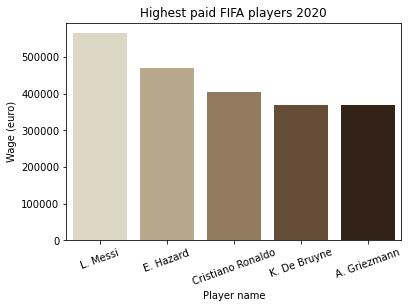

In [10]:
#9. Create a bar plot of point number 8.
#This one should be identical to number 6 in a lot of ways
ax = sns.barplot(x=five_plus_wage.short_name, y=five_plus_wage.wage_eur, palette='ch:start=1.1,rot=.1')
plt.title('Highest paid FIFA players 2020')
plt.xlabel('Player name')
plt.ylabel('Wage (euro)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)            #Pulled from an online resource. Rotation needed for readability
plt.show()

In [11]:
#10. Show top 10 records of Germany.
#Assuming from here on that "top" refers to the overall column, which the csv came pre-sorted by

#Separate out the german players
german_players_df = players_df[players_df.nationality == 'Germany'].reset_index()

#Select all players as good as or better than #10
german_overall_limit = german_players_df.overall[9]
german_players_df[['short_name', 'nationality', 'overall', 'club']][german_players_df.overall >= german_overall_limit]

#This only shows 4 columns purely for presentation purposes.

,short_name,nationality,overall,club
0,M. ter Stegen,Germany,90,FC Barcelona
1,M. Neuer,Germany,88,FC Bayern München
2,T. Kroos,Germany,88,Real Madrid
3,M. Reus,Germany,88,Borussia Dortmund
4,M. Hummels,Germany,87,Borussia Dortmund
5,L. Sané,Germany,86,Manchester City
6,J. Kimmich,Germany,86,FC Bayern München
7,T. Müller,Germany,86,FC Bayern München
8,N. Süle,Germany,85,FC Bayern München
9,K. Havertz,Germany,84,Bayer 04 Leverkusen


In [12]:
#11. Now show top 5 records of Germany players who have maximum height, weight and wages.

In [13]:
#12. Show short name and wages of top 5 Germany players.

german_overall_limit = german_players_df.overall[4]
german_players_df[['short_name', 'wage_eur']][german_players_df.overall >= german_overall_limit]

,short_name,wage_eur
0,M. ter Stegen,250000
1,M. Neuer,155000
2,T. Kroos,330000
3,M. Reus,170000
4,M. Hummels,130000


In [14]:
#13. Show top 5 players who have great shooting skills among all with short name.

shooting_df = players_df.sort_values(by=['shooting'], ascending=False).reset_index()

shooting_limit = shooting_df.shooting[4]
shooting_df[['short_name', 'shooting']][shooting_df.shooting >= shooting_limit]

,short_name,shooting
0,Cristiano Ronaldo,93.0
1,L. Messi,92.0
2,H. Kane,91.0
3,S. Agüero,90.0
4,F. Quagliarella,89.0
5,L. Suárez,89.0


In [15]:
#14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

defending_df = players_df.sort_values(by=['defending'], ascending=False).reset_index()

defending_limit = defending_df.defending[4]
defending_df[['short_name', 'defending', 'nationality', 'club']][defending_df.defending >= defending_limit]

,short_name,defending,nationality,club
0,G. Chiellini,90.0,Italy,Juventus
1,V. van Dijk,90.0,Netherlands,Liverpool
2,K. Koulibaly,89.0,Senegal,Napoli
3,D. Godín,89.0,Uruguay,Inter
4,M. Hummels,89.0,Germany,Borussia Dortmund


In [16]:
#15. Show wages records of top 5 players of 'Real Madrid' team.

#A Real Madrid dataframe needs to be made for the next several problems
real_madrid_df = players_df[players_df.club == 'Real Madrid'].reset_index()

madrid_overall_limit = real_madrid_df.overall[4]
real_madrid_df[['short_name', 'wage_eur']][real_madrid_df.overall >= madrid_overall_limit]


#this is wrong
# madrid_wages = real_madrid_df.sort_values(by=['wage_eur'], ascending=False).reset_index()

# madrid_wages_limit = madrid_wages.wage_eur[4]
# madrid_wages[['short_name', 'wage_eur']][madrid_wages.wage_eur >= madrid_wages_limit]


,short_name,wage_eur
0,E. Hazard,470000
1,L. Modrić,340000
2,Sergio Ramos,300000
3,T. Courtois,235000
4,T. Kroos,330000


In [17]:
#16. Show shooting records of top 5 players of 'Real Madrid' team.
#The last three are literally number 15 but with a different display. Half of the work is done in the above cell already

real_madrid_df[['short_name', 'shooting']][real_madrid_df.overall >= madrid_overall_limit]


,short_name,shooting
0,E. Hazard,83.0
1,L. Modrić,76.0
2,Sergio Ramos,68.0
3,T. Courtois,NaN
4,T. Kroos,80.0


In [18]:
#17. Show defending records of top 5 players of 'Real Madrid' team.

real_madrid_df[['short_name', 'defending']][real_madrid_df.overall >= madrid_overall_limit]

,short_name,defending
0,E. Hazard,35.0
1,L. Modrić,72.0
2,Sergio Ramos,87.0
3,T. Courtois,NaN
4,T. Kroos,70.0


In [19]:
#18. Show nationality records of top 5 players of 'Real Madrid' team.

real_madrid_df[['short_name', 'nationality']][real_madrid_df.overall >= madrid_overall_limit]

,short_name,nationality
0,E. Hazard,Belgium
1,L. Modrić,Croatia
2,Sergio Ramos,Spain
3,T. Courtois,Belgium
4,T. Kroos,Germany
